In [1]:
import pandas as pd
from datetime import datetime

# Estações

In [2]:
cimehgo = pd.read_excel(r"C:\Users\thiag\OneDrive\Área de Trabalho\TCC 2\Scripts\Arquivos Finais\CIMEHGO_FINAL.xlsx")
inmet = pd.read_excel(r"C:\Users\thiag\OneDrive\Área de Trabalho\TCC 2\Scripts\Arquivos Finais\INMET_FINAL.xlsx")

In [3]:
cimehgo_p = cimehgo.copy()
inmet_p = inmet.copy()

In [4]:
cimehgo_p = cimehgo_p.rename(columns={
    "ESTAÇÃO": "Estacao",
    "DATA/HORA(LOCAL)": "Data",
    "CHUVA(MM)": "Chuva_mm"
})

inmet_p = inmet_p.rename(columns={
    "ESTACAO": "Estacao",
    "Data": "Data",
    "Chuva(mm)": "Chuva_mm",                   
})
inmet_p["Chuva_mm"]   = pd.to_numeric(inmet_p["Chuva_mm"], errors="coerce").fillna(0)
cimehgo_p["Chuva_mm"] = pd.to_numeric(cimehgo_p["Chuva_mm"], errors="coerce").fillna(0)

In [5]:
inmet_p["Hora"] = pd.to_datetime(inmet_p["Hora"], format="%H:%M", errors="coerce").dt.time
inmet_p["Data"] = pd.to_datetime(inmet_p["Data"], errors="coerce")
inmet_p["Data"] = inmet_p.apply(lambda row: pd.Timestamp.combine(row["Data"], row["Hora"]), axis=1)

In [6]:
cimehgo_p = cimehgo_p[["Estacao", "Data", "Chuva_mm", "LATITUDE", "LONGITUDE"]]
inmet_p = inmet_p[["Estacao", "Data", "Chuva_mm", "LATITUDE", "LONGITUDE"]]

final_est = pd.concat([cimehgo_p, inmet_p], ignore_index=True)

In [7]:
final_est.to_csv(r"C:\Users\thiag\OneDrive\Área de Trabalho\TCC 2\Scripts\Arquivos para BI\DADOS_UNIFICADOS_ESTACOES.csv", index=False, encoding="latin1")

# Ocorrências

In [8]:
def parse_date(x):
    if pd.isna(x):
        return pd.NaT
    
    s = str(x).strip()

    # Remover dia da semana (“Sunday, January 7, 2024” → “January 7, 2024”)
    if "," in s:
        partes = s.split(",", 1)
        if len(partes) == 2:
            s = partes[1].strip()

    try:
        return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
    except:
        pass

    try:
        return datetime.strptime(s, "%B %d %Y")
    except:
        pass

    try:
        return datetime.strptime(s, "%B %d, %Y")
    except:
        pass

    return pd.NaT

In [9]:
def carregar_arquivos_raio(raio_str):
    base = r"C:\Users\thiag\OneDrive\Área de Trabalho\TCC 2\Scripts\Arquivos Finais"
    
    lp = pd.read_excel(fr"{base}\Locais_por_Data_GEOCODED_FINAL_{raio_str}.xlsx")
    rp = pd.read_excel(fr"{base}\RELATOS_GEOCODED_FINAL_{raio_str}.xlsx")
    bp = pd.read_excel(fr"{base}\BOMBEIROS_GEOCODED_FINAL_{raio_str}.xlsx")

    locais = lp.copy()
    relatos = rp.copy()
    bombeiros = bp.copy()

    if "ENDEREÇO" in bombeiros.columns:
        bombeiros = bombeiros.rename(columns={"ENDEREÇO": "LOCAL"})

    locais = locais[["DATA", "LOCAL", "Estação atribuída", "LATITUDE", "LONGITUDE"]]
    relatos = relatos[["DATA", "LOCAL", "Estação atribuída", "LATITUDE", "LONGITUDE"]]
    bombeiros = bombeiros[["DATA", "LOCAL", "Estação atribuída", "LATITUDE", "LONGITUDE"]]

    locais["Fonte"] = "Noticias"
    relatos["Fonte"] = "Relatos"
    bombeiros["Fonte"] = "Bombeiros"

    locais["DATA"] = locais["DATA"].apply(parse_date)
    relatos["DATA"] = relatos["DATA"].apply(parse_date)
    bombeiros["DATA"] = bombeiros["DATA"].apply(parse_date)

    final = pd.concat([locais, relatos, bombeiros], ignore_index=True)
    return final


In [10]:
final_ocor_1_5_km = carregar_arquivos_raio("1.5km")
final_ocor_1_5_km.head()

C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is 

,DATA,LOCAL,Estação atribuída,LATITUDE,LONGITUDE,Fonte
0,2023-11-21,Setor Oeste,sem estação correspondente,-16.681220,-49.272167,Noticias
1,2023-11-21,T-63,sem estação correspondente,-16.686900,-49.264800,Noticias
2,2023-12-31,Vila Roriz,sem estação correspondente,-16.639066,-49.265592,Noticias
3,2024-01-07,Alameda Matisse,sem estação correspondente,-16.651585,-49.285933,Noticias
4,2024-01-07,Avenida Castelo Branco,Corrego Cascavel,-16.673351,-49.300192,Noticias


In [11]:
final_ocor_5_km = carregar_arquivos_raio("5km")
final_ocor_5_km.head()

C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is 

,DATA,LOCAL,Estação atribuída,LATITUDE,LONGITUDE,Fonte
0,2023-11-21,Setor Oeste,Heliponto Goiania,-16.681220,-49.272167,Noticias
1,2023-11-21,T-63,Heliponto Goiania,-16.686900,-49.264800,Noticias
2,2023-12-31,Vila Roriz,Estação Goiania 2,-16.639066,-49.265592,Noticias
3,2024-01-07,Alameda Matisse,Perim,-16.651585,-49.285933,Noticias
4,2024-01-07,Avenida Castelo Branco,Corrego Cascavel,-16.673351,-49.300192,Noticias


In [12]:
final_ocor_10_km = carregar_arquivos_raio("10km")
final_ocor_10_km.head()

C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is 

,DATA,LOCAL,Estação atribuída,LATITUDE,LONGITUDE,Fonte
0,2023-11-21,Setor Oeste,Heliponto Goiania,-16.681220,-49.272167,Noticias
1,2023-11-21,T-63,Heliponto Goiania,-16.686900,-49.264800,Noticias
2,2023-12-31,Vila Roriz,Estação Goiania 2,-16.639066,-49.265592,Noticias
3,2024-01-07,Alameda Matisse,Perim,-16.651585,-49.285933,Noticias
4,2024-01-07,Avenida Castelo Branco,Corrego Cascavel,-16.673351,-49.300192,Noticias


In [13]:
final_ocor_20_km = carregar_arquivos_raio("20km")
final_ocor_20_km.head()

C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  return pd.to_datetime(s, errors="raise", infer_datetime_format=True)
C:\Users\thiag\AppData\Local\Temp\ipykernel_2116\1372007021.py:14: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is 

,DATA,LOCAL,Estação atribuída,LATITUDE,LONGITUDE,Fonte
0,2023-11-21,Setor Oeste,Heliponto Goiania,-16.681220,-49.272167,Noticias
1,2023-11-21,T-63,Heliponto Goiania,-16.686900,-49.264800,Noticias
2,2023-12-31,Vila Roriz,Estação Goiania 2,-16.639066,-49.265592,Noticias
3,2024-01-07,Alameda Matisse,Perim,-16.651585,-49.285933,Noticias
4,2024-01-07,Avenida Castelo Branco,Corrego Cascavel,-16.673351,-49.300192,Noticias


# Análise do Indicador - 1,5km

In [15]:
# Escolher o dataframe do raio
final_ocor = final_ocor_1_5_km.copy()

# Estações válidas
valid_stations = final_est["Estacao"].unique()
final_ocor_filt = final_ocor[ final_ocor["Estação atribuída"].isin(valid_stations) ]
final_ocor_filt = final_ocor_filt.drop_duplicates()

# Preparar dataframes
df_alag = final_ocor.copy()
df_chuva = final_est.copy()

df_chuva['Data'] = pd.to_datetime(df_chuva['Data'])
df_chuva['data_dia'] = df_chuva['Data'].dt.date

df_alag['DATA'] = pd.to_datetime(df_alag['DATA'])
df_alag['data_dia'] = df_alag['DATA'].dt.date
df_alag = df_alag.rename(columns={'Estação atribuída': 'Estacao'})

# Filtrar ocorrências com estação válida
estacoes_validas = set(df_chuva['Estacao'].unique())
df_alag_filtrado = df_alag[df_alag['Estacao'].isin(estacoes_validas)]

# Expandir com chuva do dia
df_expandido_1_5_km = pd.merge(
    df_alag_filtrado,
    df_chuva,
    on=['Estacao', 'data_dia'],
    how='left'
)

# Estações sem chuva correspondente
estacoes_ausentes_1_5_km = (
    set(df_alag['Estacao'].unique())
    - set(df_chuva['Estacao'].unique())
)

In [17]:
df_expandido_1_5_km

,DATA,LOCAL,Estacao,LATITUDE_x,LONGITUDE_x,Fonte,data_dia,Data,Chuva_mm,LATITUDE_y,LONGITUDE_y
0,2024-01-07,Avenida Castelo Branco,Corrego Cascavel,-16.673351,-49.300192,Noticias,2024-01-07,NaT,NaN,NaN,NaN
1,2024-01-07,rua dom eduardo,Corrego Cascavel,-16.671880,-49.300995,Noticias,2024-01-07,NaT,NaN,NaN,NaN
2,2024-02-06,Avenida itaberai,Vila Jardim Pompeia,-16.615139,-49.252079,Noticias,2024-02-06,NaT,NaN,NaN,NaN
3,2024-02-06,Marginal Botafogo,Heliponto Goiania,-16.684613,-49.246549,Noticias,2024-02-06,NaT,NaN,NaN,NaN
4,2024-04-04,Alameda Angélico,Perim,-16.647395,-49.288590,Noticias,2024-04-04,NaT,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1175,2021-01-11,GO 020,Heliponto Goiania,-16.680882,-49.253269,Bombeiros,2021-01-11,2021-01-11 04:14:00,0.0,-16.680104,-49.250038
1176,2021-01-11,GO 020,Heliponto Goiania,-16.680882,-49.253269,Bombeiros,2021-01-11,2021-01-11 03:14:00,0.0,-16.680104,-49.250038
1177,2021-01-11,GO 020,Heliponto Goiania,-16.680882,-49.253269,Bombeiros,2021-01-11,2021-01-11 02:14:00,0.0,-16.680104,-49.250038
1178,2021-01-11,GO 020,Heliponto Goiania,-16.680882,-49.253269,Bombeiros,2021-01-11,2021-01-11 01:14:00,2.0,-16.680104,-49.250038


# Análise 1,5km por Est

In [ ]:
estacoes_1_5km = df_expandido_1_5_km["Estacao"].unique()

dfs_por_estacao_1_5km = {
    est: (
        df_expandido_1_5_km[df_expandido_1_5_km["Estacao"] == est]
        .copy()
        .dropna(subset=["Chuva_mm"])     
    )
    for est in estacoes_1_5km
}

dfs_por_estacao_1_5km.keys()

In [ ]:
fornecimento_dados = {
    est: len(df_est)
    for est, df_est in dfs_por_estacao_1_5km.items()
}

fornecimento_dados

{'Corrego Cascavel': 24,
 'Vila Jardim Pompeia': 106,
 'Heliponto Goiania': 288,
 'Perim': 46,
 'Ribeirao Anicuns': 0,
 'Estação Goiania 2': 0,
 'GOIANIA': 96,
 'Jardim Curitiba': 0,
 'JUSANTE DE GOIÂNIA': 176,
 'Tamanduá': 0,
 'MONTANTE DE GOIÂNIA': 184,
 'Estação Aerodromo Goiania': 137,
 'Vila Brasília': 49}

# Análise do Indicador - 5km

In [18]:
final_ocor = final_ocor_5_km.copy()

valid_stations = final_est["Estacao"].unique()
final_ocor_filt = final_ocor[ final_ocor["Estação atribuída"].isin(valid_stations) ]
final_ocor_filt = final_ocor_filt.drop_duplicates()

df_alag = final_ocor.copy()
df_chuva = final_est.copy()

df_chuva['Data'] = pd.to_datetime(df_chuva['Data'])
df_chuva['data_dia'] = df_chuva['Data'].dt.date

df_alag['DATA'] = pd.to_datetime(df_alag['DATA'])
df_alag['data_dia'] = df_alag['DATA'].dt.date
df_alag = df_alag.rename(columns={'Estação atribuída': 'Estacao'})

estacoes_validas = set(df_chuva['Estacao'].unique())
df_alag_filtrado = df_alag[df_alag['Estacao'].isin(estacoes_validas)]

df_expandido_5_km = pd.merge(
    df_alag_filtrado,
    df_chuva,
    on=['Estacao', 'data_dia'],
    how='left'
)

estacoes_ausentes_5_km = (
    set(df_alag['Estacao'].unique())
    - set(df_chuva['Estacao'].unique())
)


In [46]:
estacoes_5km = df_expandido_5_km["Estacao"].unique()

dfs_por_estacao_5km = {
    est: (
        df_expandido_5_km[df_expandido_5_km["Estacao"] == est]
        .copy()
        .dropna(subset=["Chuva_mm"])     
    )
    for est in estacoes_5km
}

dfs_por_estacao_5km.keys()

dict_keys(['Heliponto Goiania', 'Estação Goiania 2', 'Perim', 'Corrego Cascavel', 'Vila Jardim Pompeia', 'Ribeirao Anicuns', 'JUSANTE DE GOIÂNIA', 'Vera Cruz', 'GOIANIA', 'Vila Brasília', 'Tamanduá', 'MONTANTE DE GOIÂNIA', 'Parque Veiga Jardim', 'Jardim Curitiba', 'Residencial Caraibas', 'Estação Aerodromo Goiania'])

In [50]:
fornecimento_dados = {
    est: len(df_est)
    for est, df_est in dfs_por_estacao_5km.items()
}

fornecimento_dados

{'Heliponto Goiania': 552,
 'Estação Goiania 2': 144,
 'Perim': 201,
 'Corrego Cascavel': 48,
 'Vila Jardim Pompeia': 106,
 'Ribeirao Anicuns': 0,
 'JUSANTE DE GOIÂNIA': 1228,
 'Vera Cruz': 227,
 'GOIANIA': 528,
 'Vila Brasília': 294,
 'Tamanduá': 44,
 'MONTANTE DE GOIÂNIA': 1048,
 'Parque Veiga Jardim': 31,
 'Jardim Curitiba': 157,
 'Residencial Caraibas': 0,
 'Estação Aerodromo Goiania': 137}

# Análise do Indicador - 10km

In [22]:
final_ocor = final_ocor_10_km.copy()

valid_stations = final_est["Estacao"].unique()
final_ocor_filt = final_ocor[ final_ocor["Estação atribuída"].isin(valid_stations) ]
final_ocor_filt = final_ocor_filt.drop_duplicates()

df_alag = final_ocor.copy()
df_chuva = final_est.copy()

df_chuva['Data'] = pd.to_datetime(df_chuva['Data'])
df_chuva['data_dia'] = df_chuva['Data'].dt.date

df_alag['DATA'] = pd.to_datetime(df_alag['DATA'])
df_alag['data_dia'] = df_alag['DATA'].dt.date
df_alag = df_alag.rename(columns={'Estação atribuída': 'Estacao'})

estacoes_validas = set(df_chuva['Estacao'].unique())
df_alag_filtrado = df_alag[df_alag['Estacao'].isin(estacoes_validas)]

df_expandido_10_km = pd.merge(
    df_alag_filtrado,
    df_chuva,
    on=['Estacao', 'data_dia'],
    how='left'
)

estacoes_ausentes_10_km = (
    set(df_alag['Estacao'].unique())
    - set(df_chuva['Estacao'].unique())
)

In [47]:
estacoes_10km = df_expandido_10_km["Estacao"].unique()

dfs_por_estacao_10km = {
    est: (
        df_expandido_10_km[df_expandido_10_km["Estacao"] == est]
        .copy()
        .dropna(subset=["Chuva_mm"])     
    )
    for est in estacoes_10km
}

dfs_por_estacao_10km.keys()

dict_keys(['Heliponto Goiania', 'Estação Goiania 2', 'Perim', 'Corrego Cascavel', 'Vila Jardim Pompeia', 'Ribeirao Anicuns', 'JUSANTE DE GOIÂNIA', 'Vera Cruz', 'Jardim Curitiba', 'GOIANIA', 'Vila Brasília', 'Tamanduá', 'MONTANTE DE GOIÂNIA', 'Parque Veiga Jardim', 'Residencial Caraibas', 'Estação Aerodromo Goiania'])

In [51]:
fornecimento_dados = {
    est: len(df_est)
    for est, df_est in dfs_por_estacao_10km.items()
}

fornecimento_dados

{'Heliponto Goiania': 552,
 'Estação Goiania 2': 144,
 'Perim': 201,
 'Corrego Cascavel': 48,
 'Vila Jardim Pompeia': 106,
 'Ribeirao Anicuns': 0,
 'JUSANTE DE GOIÂNIA': 1228,
 'Vera Cruz': 227,
 'Jardim Curitiba': 250,
 'GOIANIA': 528,
 'Vila Brasília': 294,
 'Tamanduá': 73,
 'MONTANTE DE GOIÂNIA': 1048,
 'Parque Veiga Jardim': 31,
 'Residencial Caraibas': 0,
 'Estação Aerodromo Goiania': 137}

# Análise do Indicador - 20km

In [25]:
final_ocor = final_ocor_20_km.copy()

valid_stations = final_est["Estacao"].unique()
final_ocor_filt = final_ocor[ final_ocor["Estação atribuída"].isin(valid_stations) ]
final_ocor_filt = final_ocor_filt.drop_duplicates()

df_alag = final_ocor.copy()
df_chuva = final_est.copy()

df_chuva['Data'] = pd.to_datetime(df_chuva['Data'])
df_chuva['data_dia'] = df_chuva['Data'].dt.date

df_alag['DATA'] = pd.to_datetime(df_alag['DATA'])
df_alag['data_dia'] = df_alag['DATA'].dt.date
df_alag = df_alag.rename(columns={'Estação atribuída': 'Estacao'})

estacoes_validas = set(df_chuva['Estacao'].unique())
df_alag_filtrado = df_alag[df_alag['Estacao'].isin(estacoes_validas)]

df_expandido_20_km = pd.merge(
    df_alag_filtrado,
    df_chuva,
    on=['Estacao', 'data_dia'],
    how='left'
)

estacoes_ausentes_20_km = (
    set(df_alag['Estacao'].unique())
    - set(df_chuva['Estacao'].unique())
)


In [48]:
estacoes_20km = df_expandido_20_km["Estacao"].unique()

dfs_por_estacao_20km = {
    est: (
        df_expandido_20_km[df_expandido_20_km["Estacao"] == est]
        .copy()
        .dropna(subset=["Chuva_mm"])     
    )
    for est in estacoes_20km
}

dfs_por_estacao_20km.keys()

dict_keys(['Heliponto Goiania', 'Estação Goiania 2', 'Perim', 'Corrego Cascavel', 'Vila Jardim Pompeia', 'Ribeirao Anicuns', 'JUSANTE DE GOIÂNIA', 'Vera Cruz', 'Jardim Curitiba', 'GOIANIA', 'Vila Brasília', 'Tamanduá', 'MONTANTE DE GOIÂNIA', 'Parque Veiga Jardim', 'Residencial Caraibas', 'Estação Aerodromo Goiania'])

In [52]:
fornecimento_dados = {
    est: len(df_est)
    for est, df_est in dfs_por_estacao_20km.items()
}

fornecimento_dados

{'Heliponto Goiania': 552,
 'Estação Goiania 2': 144,
 'Perim': 201,
 'Corrego Cascavel': 48,
 'Vila Jardim Pompeia': 106,
 'Ribeirao Anicuns': 0,
 'JUSANTE DE GOIÂNIA': 1228,
 'Vera Cruz': 227,
 'Jardim Curitiba': 250,
 'GOIANIA': 528,
 'Vila Brasília': 294,
 'Tamanduá': 73,
 'MONTANTE DE GOIÂNIA': 1048,
 'Parque Veiga Jardim': 31,
 'Residencial Caraibas': 0,
 'Estação Aerodromo Goiania': 137}

# Análise da Estação JUSANTE DE GOIÂNIA

In [53]:
df_jussante_1_5 = dfs_por_estacao_1_5km["JUSANTE DE GOIÂNIA"]
df_jussante_5 = dfs_por_estacao_5km["JUSANTE DE GOIÂNIA"]
df_jussante_10 = dfs_por_estacao_10km["JUSANTE DE GOIÂNIA"]
df_jussante_20 = dfs_por_estacao_20km["JUSANTE DE GOIÂNIA"]

In [58]:
df_jussante_1_5["DATA"].dropna().dt.date.unique()

array([datetime.date(2022, 2, 7), datetime.date(2024, 2, 6)], dtype=object)

In [55]:
df_jussante_5

,DATA,LOCAL,Estacao,LATITUDE_x,LONGITUDE_x,Fonte,data_dia,Data,Chuva_mm,LATITUDE_y,LONGITUDE_y
20,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:45:00,0.0,-16.679833,-49.200175
21,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:30:00,0.0,-16.679833,-49.200175
22,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:15:00,0.0,-16.679833,-49.200175
23,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:00:00,0.0,-16.679833,-49.200175
24,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 22:45:00,0.0,-16.679833,-49.200175
...,...,...,...,...,...,...,...,...,...,...,...
4825,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 01:00:00,0.0,-16.679833,-49.200175
4826,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:45:00,0.0,-16.679833,-49.200175
4827,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:30:00,0.0,-16.679833,-49.200175
4828,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:15:00,0.0,-16.679833,-49.200175


In [56]:
df_jussante_10

,DATA,LOCAL,Estacao,LATITUDE_x,LONGITUDE_x,Fonte,data_dia,Data,Chuva_mm,LATITUDE_y,LONGITUDE_y
20,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:45:00,0.0,-16.679833,-49.200175
21,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:30:00,0.0,-16.679833,-49.200175
22,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:15:00,0.0,-16.679833,-49.200175
23,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:00:00,0.0,-16.679833,-49.200175
24,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 22:45:00,0.0,-16.679833,-49.200175
...,...,...,...,...,...,...,...,...,...,...,...
4947,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 01:00:00,0.0,-16.679833,-49.200175
4948,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:45:00,0.0,-16.679833,-49.200175
4949,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:30:00,0.0,-16.679833,-49.200175
4950,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:15:00,0.0,-16.679833,-49.200175


In [66]:
pd.reset_option("display.max_rows")
pd.reset_option("display.max_columns")
pd.reset_option("display.max_colwidth")

In [67]:
df_jussante_20

,DATA,LOCAL,Estacao,LATITUDE_x,LONGITUDE_x,Fonte,data_dia,Data,Chuva_mm,LATITUDE_y,LONGITUDE_y
20,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:45:00,0.0,-16.679833,-49.200175
21,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:30:00,0.0,-16.679833,-49.200175
22,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:15:00,0.0,-16.679833,-49.200175
23,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 23:00:00,0.0,-16.679833,-49.200175
24,2024-04-04,Jardim Novo Mundo 02,JUSANTE DE GOIÂNIA,-16.676986,-49.218349,Noticias,2024-04-04,2024-04-04 22:45:00,0.0,-16.679833,-49.200175
...,...,...,...,...,...,...,...,...,...,...,...
4947,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 01:00:00,0.0,-16.679833,-49.200175
4948,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:45:00,0.0,-16.679833,-49.200175
4949,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:30:00,0.0,-16.679833,-49.200175
4950,2021-02-11,AVENIDA FRANCISCO SALES,JUSANTE DE GOIÂNIA,-16.663355,-49.182862,Bombeiros,2021-02-11,2021-02-11 00:15:00,0.0,-16.679833,-49.200175


In [71]:
estatisticas_jussante_20 = (
    df_jussante_20
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

In [72]:
estatisticas_jussante_20 = estatisticas_jussante_20.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

In [73]:
estatisticas_jussante_20

,data_dia,menor valor,maior valor,média,qtd. de dados da est.
0,2020-11-20,0.0,29.0,0.813043,92
1,2021-02-07,0.0,10.6,0.210417,96
2,2021-02-11,0.0,23.6,1.150000,384
3,2022-01-27,0.0,14.2,0.531250,192
4,2022-02-07,0.0,9.8,0.468750,96
5,2024-01-04,0.0,0.0,0.000000,96
6,2024-02-06,0.0,0.0,0.000000,80
7,2024-03-10,0.0,17.0,0.925000,96
8,2024-04-04,0.0,1.4,0.064583,96


In [61]:
soma_por_dia = df_jussante_20.groupby(df_jussante_20["DATA"].dt.date)["Chuva_mm"].sum()
dias_validos = soma_por_dia[soma_por_dia > 0].index


In [ ]:
df_jussante_20_filtrado = df_jussante_20[
    df_jussante_20["DATA"].dt.date.isin(dias_validos)
].copy()

estatisticas_jussante_20_f = (
    df_jussante_20_filtrado
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

estatisticas_jussante_20_f = estatisticas_jussante_20_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

In [76]:
estatisticas_jussante_20_f = (
    df_jussante_20_filtrado
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

estatisticas_jussante_20_f = estatisticas_jussante_20_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

In [77]:
estatisticas_jussante_20_f

,data_dia,menor valor,maior valor,média,qtd. de dados da est.
0,2020-11-20,0.0,29.0,0.813043,92
1,2021-02-07,0.0,10.6,0.210417,96
2,2021-02-11,0.0,23.6,1.150000,384
3,2022-01-27,0.0,14.2,0.531250,192
4,2022-02-07,0.0,9.8,0.468750,96
5,2024-03-10,0.0,17.0,0.925000,96
6,2024-04-04,0.0,1.4,0.064583,96


In [78]:
# 1. Mantém apenas valores de chuva > 0
df_jussante_20_valido = df_jussante_20[df_jussante_20["Chuva_mm"] > 0].copy()

# 2. Garante que a coluna data_dia exista
df_jussante_20_valido["data_dia"] = df_jussante_20_valido["DATA"].dt.date

# 3. Calcula estatísticas por dia
estatisticas_jussante_20_f = (
    df_jussante_20_valido
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

# 4. Renomeia as colunas
estatisticas_jussante_20_f = estatisticas_jussante_20_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})


In [79]:
estatisticas_jussante_20_f

,data_dia,menor valor,maior valor,média,qtd. de dados da est.
0,2020-11-20,0.2,29.0,4.400000,17
1,2021-02-07,0.2,10.6,1.683333,12
2,2021-02-11,0.2,23.6,6.133333,72
3,2022-01-27,0.2,14.2,3.642857,28
4,2022-02-07,0.2,9.8,1.666667,27
5,2024-03-10,0.2,17.0,4.228571,21
6,2024-04-04,0.2,1.4,0.688889,9


# Analise Final

In [80]:
# 1. Mantém apenas valores de chuva > 0
df_jussante_20_valido = df_jussante_20[df_jussante_20["Chuva_mm"] > 0].copy()

# 2. Garante que a coluna data_dia exista
df_jussante_20_valido["data_dia"] = df_jussante_20_valido["DATA"].dt.date

# 3. Calcula estatísticas por dia
estatisticas_jussante_20_f = (
    df_jussante_20_valido
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

# 4. Renomeia as colunas
estatisticas_jussante_20_f = estatisticas_jussante_20_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

# 5. Extrair apenas a coluna "maior valor"
chuvas_maximas = estatisticas_jussante_20_f["maior valor"]

# 6. Cálculo da mediana
valor_limite_mediana = chuvas_maximas.median()

# 7. Cálculo do percentil 75
valor_limite_p75 = chuvas_maximas.quantile(0.75)

valor_limite_mediana, valor_limite_p75


(14.2, np.float64(20.3))

In [81]:
# 1. Mantém apenas valores de chuva > 0
df_jussante_10_valido = df_jussante_10[df_jussante_10["Chuva_mm"] > 0].copy()

# 2. Garante que a coluna data_dia exista
df_jussante_10_valido["data_dia"] = df_jussante_10_valido["DATA"].dt.date

# 3. Calcula estatísticas por dia
estatisticas_jussante_10_f = (
    df_jussante_10_valido
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

# 4. Renomeia as colunas
estatisticas_jussante_10_f = estatisticas_jussante_10_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

# 5. Extrair apenas a coluna "maior valor"
chuvas_maximas = estatisticas_jussante_10_f["maior valor"]

# 6. Cálculo da mediana
valor_limite_mediana = chuvas_maximas.median()

# 7. Cálculo do percentil 75
valor_limite_p75 = chuvas_maximas.quantile(0.75)

valor_limite_mediana, valor_limite_p75


(14.2, np.float64(20.3))

In [82]:
# 1. Mantém apenas valores de chuva > 0
df_jussante_5_valido = df_jussante_5[df_jussante_5["Chuva_mm"] > 0].copy()

# 2. Garante que a coluna data_dia exista
df_jussante_5_valido["data_dia"] = df_jussante_5_valido["DATA"].dt.date

# 3. Calcula estatísticas por dia
estatisticas_jussante_5_f = (
    df_jussante_5_valido
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

# 4. Renomeia as colunas
estatisticas_jussante_5_f = estatisticas_jussante_5_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

# 5. Extrair apenas a coluna "maior valor"
chuvas_maximas = estatisticas_jussante_5_f["maior valor"]

# 6. Cálculo da mediana
valor_limite_mediana = chuvas_maximas.median()

# 7. Cálculo do percentil 75
valor_limite_p75 = chuvas_maximas.quantile(0.75)

valor_limite_mediana, valor_limite_p75


(14.2, np.float64(20.3))

In [87]:
# 1. Mantém apenas valores de chuva > 0
df_jussante_1_5_valido = df_jussante_1_5[df_jussante_1_5["Chuva_mm"] > 0].copy()

# 2. Garante que a coluna data_dia exista
df_jussante_1_5_valido["data_dia"] = df_jussante_1_5_valido["DATA"].dt.date

# 3. Calcula estatísticas por dia
estatisticas_jussante_1_5_f = (
    df_jussante_1_5_valido
    .groupby("data_dia")["Chuva_mm"]
    .agg(["min", "max", "mean", "count"])
    .reset_index()
)

# 4. Renomeia as colunas
estatisticas_jussante_1_5_f = estatisticas_jussante_1_5_f.rename(columns={
    "min": "menor valor",
    "max": "maior valor",
    "mean": "média",
    "count": "qtd. de dados da est."
})

# 5. Extrair apenas a coluna "maior valor"
chuvas_maximas = estatisticas_jussante_1_5_f["maior valor"]

# 6. Cálculo da mediana
valor_limite_mediana = chuvas_maximas.median()

# 7. Cálculo do percentil 75
valor_limite_p75 = chuvas_maximas.quantile(0.75)

valor_limite_mediana, valor_limite_p75



(9.8, np.float64(9.8))

In [88]:
dfs_jussante = {
    "1.5 km": df_jussante_1_5,
    "5 km": df_jussante_5,
    "10 km": df_jussante_10,
    "20 km": df_jussante_20
}

In [89]:
resultados = []

for raio, df in dfs_jussante.items():

    # Mantém apenas valores de chuva > 0
    df_valido = df[df["Chuva_mm"] > 0].copy()

    # Garante coluna data_dia
    df_valido["data_dia"] = df_valido["DATA"].dt.date

    # Estatísticas por dia
    est = (
        df_valido
        .groupby("data_dia")["Chuva_mm"]
        .agg(["min", "max", "mean", "count"])
        .reset_index()
    )

    est = est.rename(columns={
        "min": "menor valor",
        "max": "maior valor",
        "mean": "média",
        "count": "qtd. de dados da est."
    })

    # Calcula chuva máxima diária
    chuvas_max = est["maior valor"]

    # Calcula mediana e p75
    mediana = chuvas_max.median()
    p75 = chuvas_max.quantile(0.75)

    # Armazena no resultado
    resultados.append({
        "Raio": raio,
        "Mediana (mm)": round(mediana, 1),
        "Percentil 75 (mm)": round(float(p75), 1)
    })


In [91]:
import matplotlib.pyplot as plt


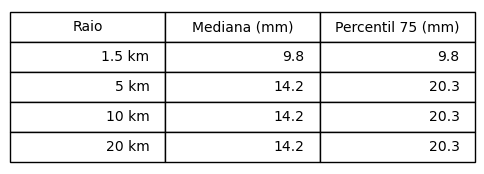

In [92]:
data = {
    "Raio": ["1.5 km", "5 km", "10 km", "20 km"],
    "Mediana (mm)": [9.8, 14.2, 14.2, 14.2],
    "Percentil 75 (mm)": [9.8, 20.3, 20.3, 20.3]
}

df = pd.DataFrame(data)

# Create figure
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')

# Create the table inside the figure
tbl = ax.table(
    cellText=df.values,
    colLabels=df.columns,
    loc='center'
)

tbl.auto_set_font_size(False)
tbl.set_fontsize(10)
tbl.scale(1, 1.8)

# Save as JPG
output_path = r"C:\Users\thiag\OneDrive\Área de Trabalho\TCC 2\Scripts/tabela_jussante_resultados.jpg"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
